In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-science-jobs/data_science_job.csv


In [2]:
df = pd.read_csv('/kaggle/input/data-science-jobs/data_science_job.csv')

In [3]:
df.sample(5)

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
9360,22800,city_41,0.827,Male,Has relevent experience,Full time course,High School,NaN,4.0,50-99,Early Stage Startup,18.0,1.0
15818,9765,city_150,0.698,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,1000-4999,Pvt Ltd,22.0,0.0
5016,16428,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,4.0,5000-9999,NaN,14.0,1.0
5609,8077,city_67,0.855,Male,Has relevent experience,no_enrollment,High School,NaN,5.0,50-99,Pvt Ltd,57.0,0.0
15201,20958,city_103,NaN,Male,Has relevent experience,no_enrollment,Graduate,STEM,11.0,500-999,Pvt Ltd,34.0,0.0


In [4]:
df.isnull().mean()*100

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

In [5]:
col = [var for var in df.columns if df[var].isnull().mean() < 0.05 and df[var].isnull().mean() > 0]

In [6]:
col

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [7]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [8]:
len(df[col].dropna())/len(df)

0.8968577095730244

In [9]:
new_df = df[col].dropna()
new_df.shape , df.shape

((17182, 5), (19158, 13))

In [10]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17182 entries, 0 to 19157
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  17182 non-null  float64
 1   enrolled_university     17182 non-null  object 
 2   education_level         17182 non-null  object 
 3   experience              17182 non-null  float64
 4   training_hours          17182 non-null  float64
dtypes: float64(3), object(2)
memory usage: 805.4+ KB


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

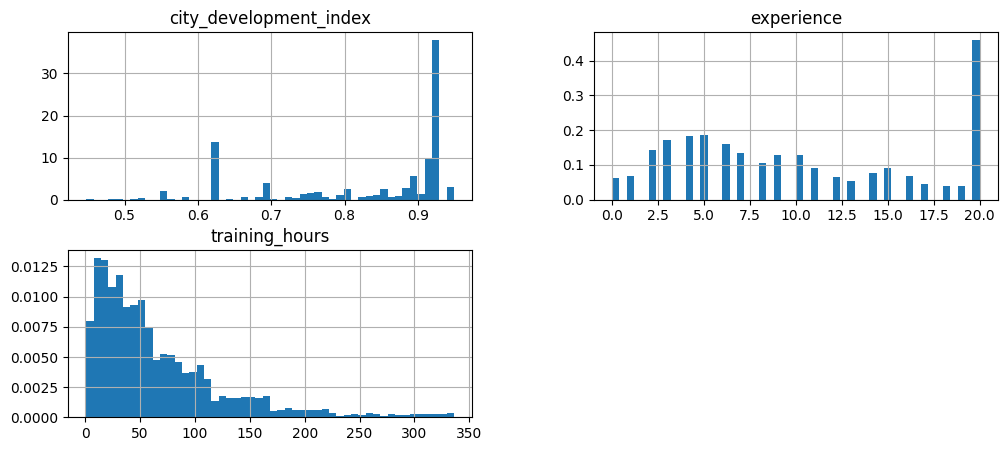

In [12]:
new_df.hist(bins=50, density = True, figsize=(12,5))
plt.show()

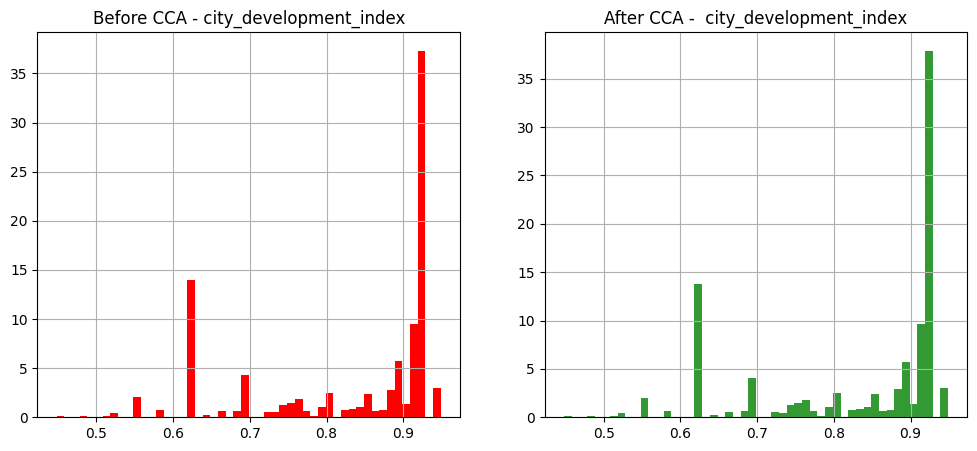

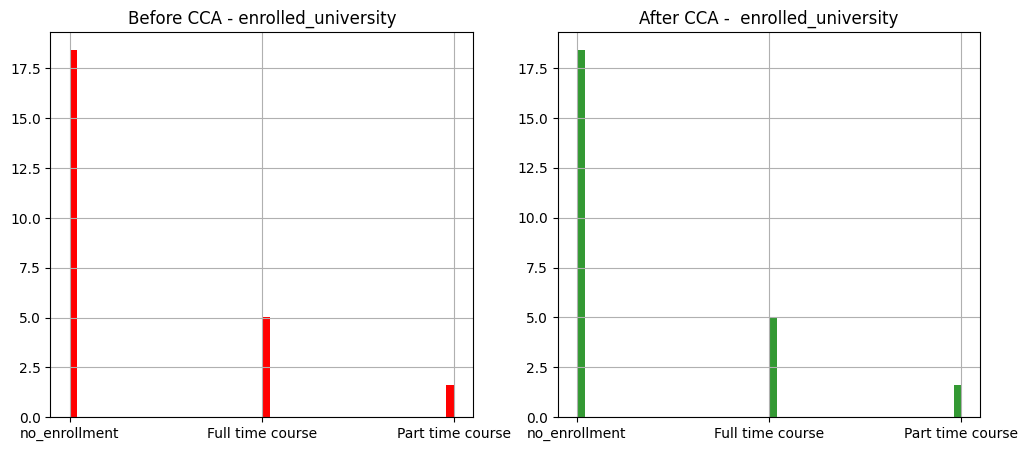

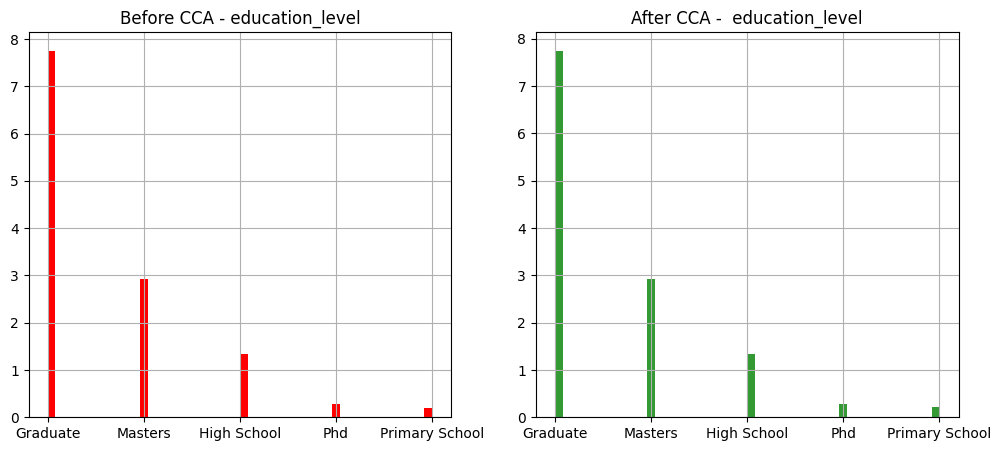

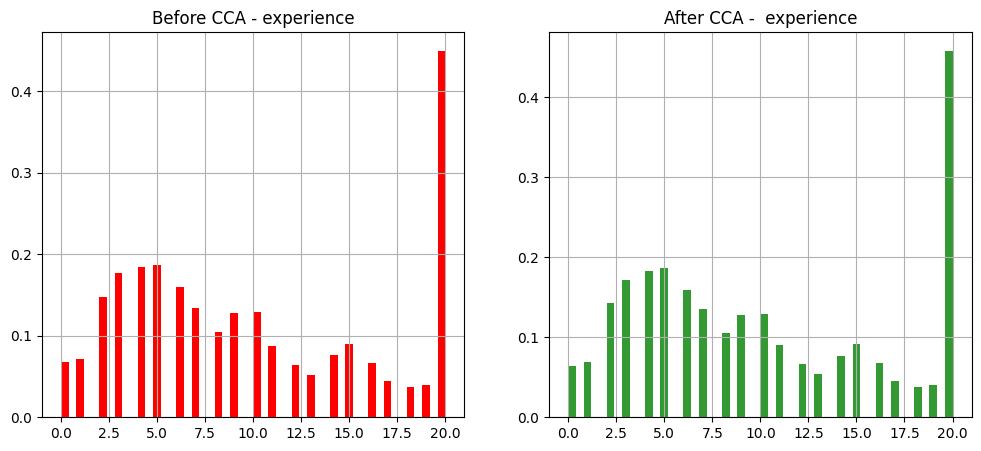

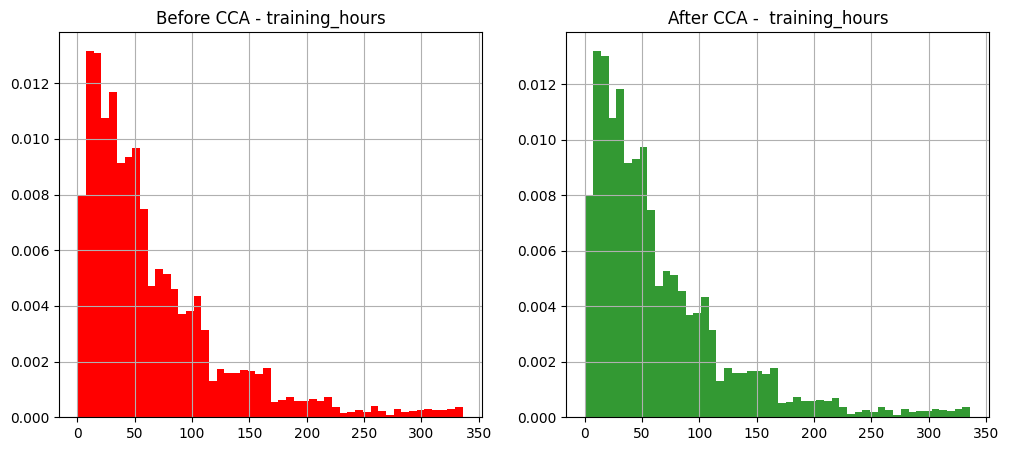

In [13]:
for col in new_df.columns:
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,5))
    # original data
    df[col].hist(bins=50, ax=ax1, density=True, color='red')
    ax1.set_title("Before CCA - " + col)
    
    # data after cca, the argument alpha makes the color transparent, so we can
    # see the overlay of the 2 distributions
    new_df[col].hist(bins=50, ax=ax2, color='green', density=True, alpha=0.8)
    ax2.set_title("After CCA -  " + col)